<a href="https://colab.research.google.com/github/JonPaulBIlbao/ML-Finance-DBS/blob/Logistic-regression/Logistic_Regression_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

### This is a test

This is a test

In [2]:
a = [2,3,4]

In [3]:
a

[2, 3, 4]

In [4]:
# import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
%pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 16.1 MB/s eta 0:00:00


In [8]:
import sklearn

In [9]:
import mglearn

In [11]:
# import matplotlib.pyplot as plt

# 1. Reading csv data:

In [77]:
data = pd.read_csv('https://raw.githubusercontent.com/JonPaulBIlbao/ML-Finance-DBS/Logistic-regression/churn.csv', header=0)

In [46]:
data = data.dropna()
print(data.shape)
print(list(data.columns))

(3333, 21)
['State', 'Account Length', 'Area Code', 'Phone', 'Intl Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn']


In [78]:
data.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [48]:
print("Shape of the DataFrame:", data.shape)
print("\nColumn Names:", data.columns)
print("\nData Types:\n", data.dtypes)
print("\nSample Rows:\n", data.head())  # This will display the first 5 rows. You can change the number inside head() for more/less rows.


Shape of the DataFrame: (3333, 21)

Column Names: Index(['State', 'Account Length', 'Area Code', 'Phone', 'Intl Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

Data Types:
 State              object
Account Length      int64
Area Code           int64
Phone              object
Intl Plan          object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn                bool
dtype: object

Sample Rows:
   State  Account L

# 2. Data exploration

## Churn and International Plan

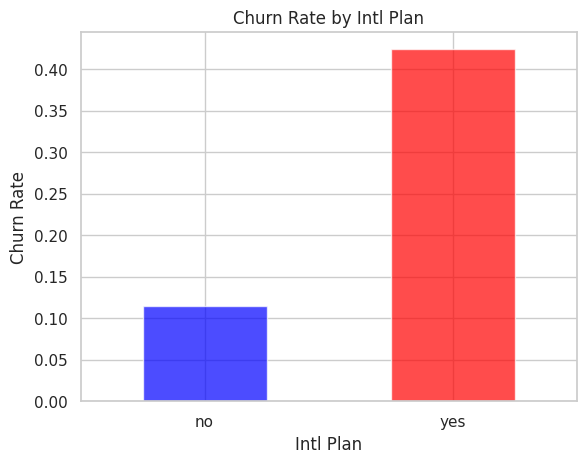

In [49]:
# Churn rate by Intl Plan
churn_by_intl_plan = data.groupby('Intl Plan')['Churn'].mean()
churn_by_intl_plan.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.title('Churn Rate by Intl Plan')
plt.ylabel('Churn Rate')
plt.xlabel('Intl Plan')
plt.xticks(rotation=0)
plt.show()

## Churn and Voice Mail Plan

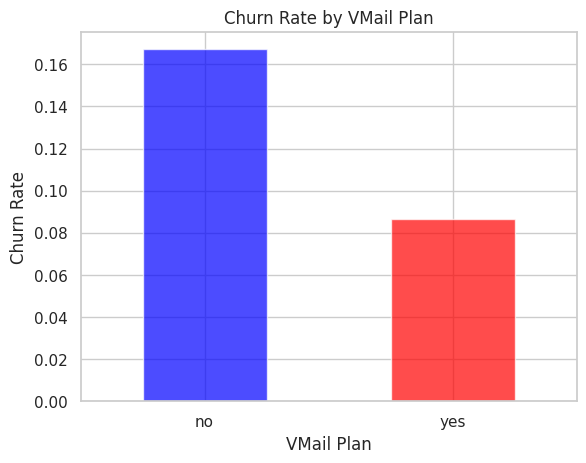

In [50]:
# Churn rate by VMail Plan
churn_by_intl_plan = data.groupby('VMail Plan')['Churn'].mean()
churn_by_intl_plan.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.title('Churn Rate by VMail Plan')
plt.ylabel('Churn Rate')
plt.xlabel('VMail Plan')
plt.xticks(rotation=0)
plt.show()

## Churn and Number of Calls to Customer Service Centre

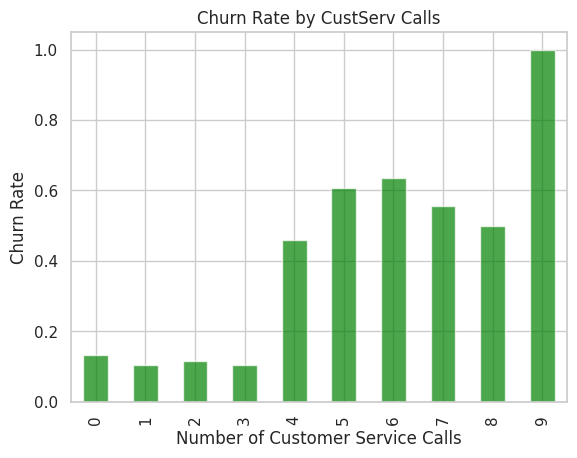

In [51]:
# Churn rate by CustServ Calls
churn_by_custserv_calls = data.groupby('CustServ Calls')['Churn'].mean()
churn_by_custserv_calls.plot(kind='bar', color='green', alpha=0.7)
plt.title('Churn Rate by CustServ Calls')
plt.ylabel('Churn Rate')
plt.xlabel('Number of Customer Service Calls')
plt.show()

## Churn rate: Top 20 States

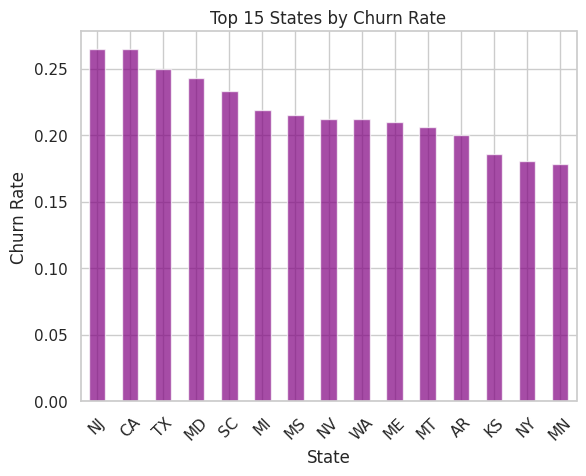

In [52]:
# Calculate churn rate by state
churn_by_state = data.groupby('State')['Churn'].mean().sort_values(ascending=False)

# Plot the top 15 states with highest churn rate
churn_by_state.head(15).plot(kind='bar', color='purple', alpha=0.7)
plt.title('Top 15 States by Churn Rate')
plt.ylabel('Churn Rate')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()


In [53]:
import seaborn as sns
# import matplotlib.pyplot as plt

## Correlations: Calls, Charge, Duration by Churn
### Day timeframe

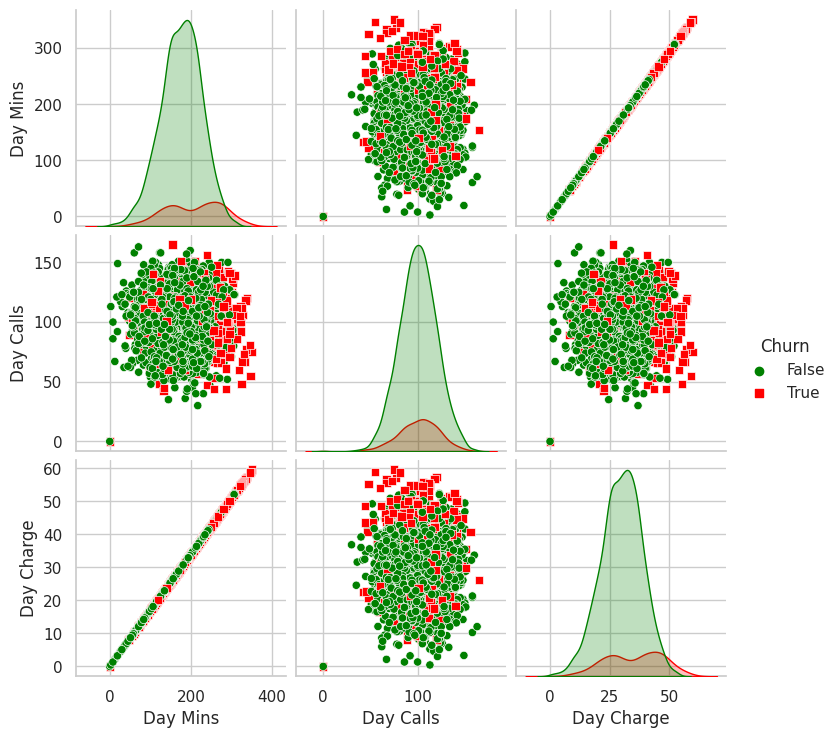

In [54]:

# Selecting columns starting with 'Day'
cols = [col for col in data.columns if col.startswith(('Day'))]

# Plotting pairplot with hue based on 'Churn'
sns.pairplot(data=data, vars=cols, hue='Churn', palette={True: 'red', False: 'green'}, markers=["o", "s"])

plt.show()


## Correlations: Calls, Charge, Duration by Churn
### Evening timeframe

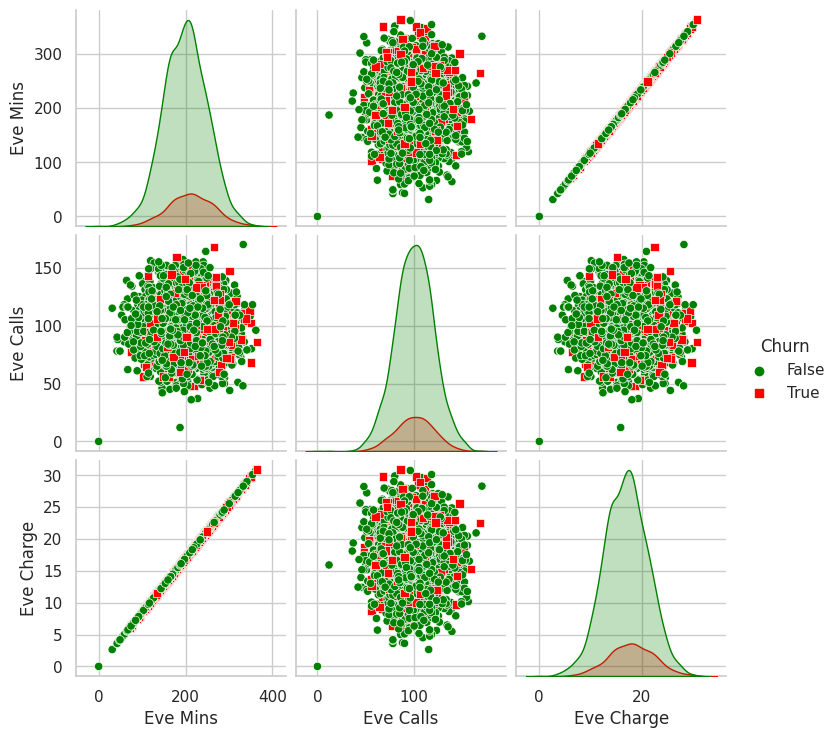

In [55]:
# Selecting columns starting with 'Eve'
cols = [col for col in data.columns if col.startswith(('Eve'))]

# Plotting pairplot with hue based on 'Churn'
sns.pairplot(data=data, vars=cols, hue='Churn', palette={True: 'red', False: 'green'}, markers=["o", "s"])

plt.show()


## Correlations: Calls, Charge, Duration by Churn
### Night timeframe

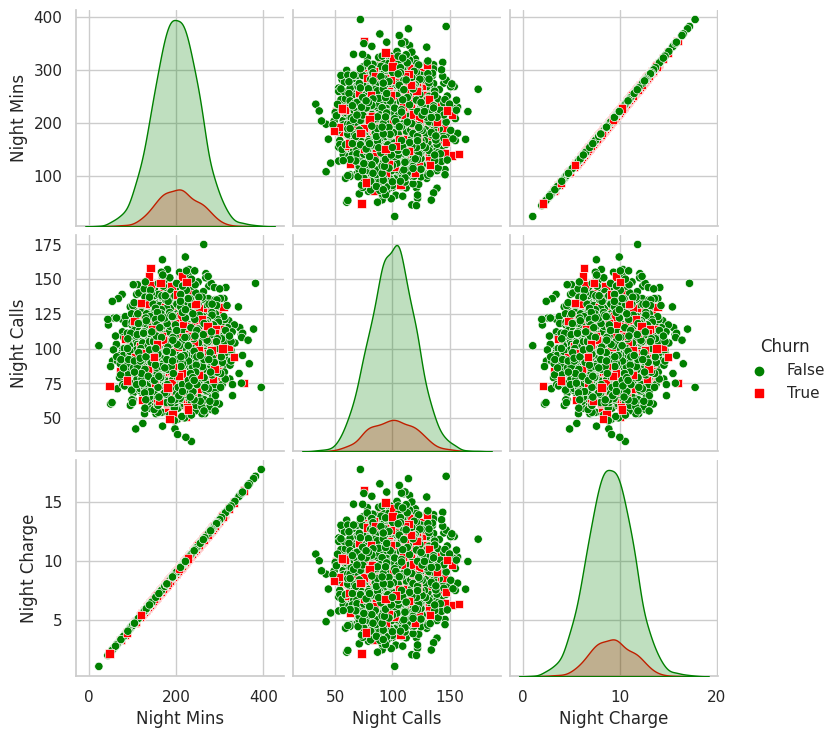

In [56]:
# Selecting columns starting 'Night'
cols = [col for col in data.columns if col.startswith(('Night'))]

# Plotting pairplot with hue based on 'Churn'
sns.pairplot(data=data, vars=cols, hue='Churn', palette={True: 'red', False: 'green'}, markers=["o", "s"])

plt.show()


## International Plan by Churn
### Chi-square test

In [57]:
# import pandas as pd
from scipy.stats import chi2_contingency


In [74]:
# Creating a contingency table
contingency_table = pd.crosstab(data['Intl Plan'], data['Churn'])

# Performing the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Rounding the Chi-Square Value to a specific number of decimal places
decimal_places = 2  # You can change this to the desired number of decimal places
chi2 = round(chi2, decimal_places)

# Check if p-value is lower than 0.001
if p < 0.001:
    p_str = "p lower than 0.001"
else:
    p_str = f"P-Value = {round(p, decimal_places)}"

print(f"Chi-Square Value = {chi2}")
print(p_str)

Chi-Square Value = 222.57
p lower than 0.001


In [59]:
import statsmodels.api as sm
# import pandas as pd

# Logistic regression

In [60]:
# Dataframe is named 'data'

# Convert categorical variables 'Intl Plan' and 'VMail Plan' to numerical format
data['Intl_Plan_num'] = data['Intl Plan'].map({'yes': 1, 'no': 0})
data['VMail_Plan_num'] = data['VMail Plan'].map({'yes': 1, 'no': 0})

# Define the explanatory variables
X = data[['Intl_Plan_num', 'CustServ Calls', 'VMail_Plan_num', 'Day Charge']]
X = sm.add_constant(X)  # Adding a constant (intercept) to the model

# Define the target variable
y = data['Churn']



### Let $\pi$ be defined as the probability of $\text{Churn} = TRUE$.

\begin{equation}
\log\left(\frac{\pi}{1 - \pi}\right) = \beta_0 + \beta_1 \text{Intl Plan} + \beta_2 \text{CustServ Calls} + \beta_3 \text{VMail Plan} + \beta_4 \text{Day Charge}
\end{equation}

In [61]:
# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.336645
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3328
Method:                           MLE   Df Model:                            4
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                  0.1864
Time:                        10:29:16   Log-Likelihood:                -1122.0
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                5.625e-110
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.1614      0.248    -20.790      0.000      -5.648      -4.675
Intl_Plan_num    

### Same logistic regression fitting using dummy variables

In [87]:
# Create dummy variables for the categorical explanatory variables
X = pd.get_dummies(data[['Intl Plan', 'VMail Plan', 'CustServ Calls', 'Day Charge']], columns=['Intl Plan', 'VMail Plan'], drop_first=True)
X = sm.add_constant(X)  # Adding a constant (intercept) to the model

# Define the target variable
y = data['Churn']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.336645
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3328
Method:                           MLE   Df Model:                            4
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                  0.1864
Time:                        11:26:14   Log-Likelihood:                -1122.0
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                5.625e-110
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.1614      0.248    -20.790      0.000      -5.648      -4.675
CustServ Calls   

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [90]:
# Create dummy variables for the categorical explanatory variables
X = pd.get_dummies(data[['Intl Plan', 'VMail Plan', 'CustServ Calls', 'Day Charge']], columns=['Intl Plan', 'VMail Plan'], drop_first=True)
X = sm.add_constant(X)  # Adding a constant (intercept) to the model

# Define the target variable
y = data['Churn']

In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=423)

# Fit the logistic regression model on the training set
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.332035
         Iterations 7


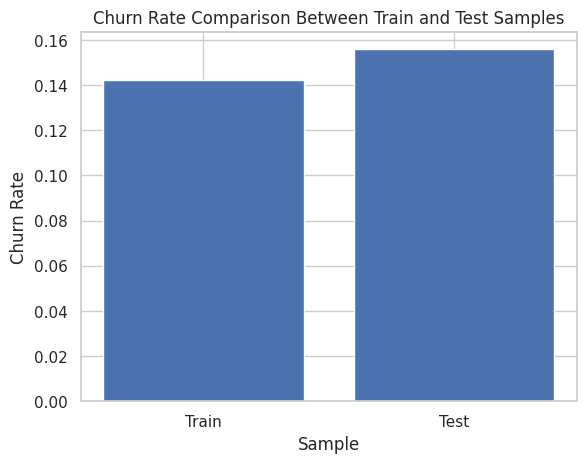

In [100]:
import matplotlib.pyplot as plt

# Calculate churn rate for train and test samples
train_churn_rate = y_train.mean()
test_churn_rate = y_test.mean()

# Create a bar chart to compare churn rates
labels = ['Train', 'Test']
churn_rates = [train_churn_rate, test_churn_rate]

plt.bar(labels, churn_rates)
plt.xlabel('Sample')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Comparison Between Train and Test Samples')
plt.show()


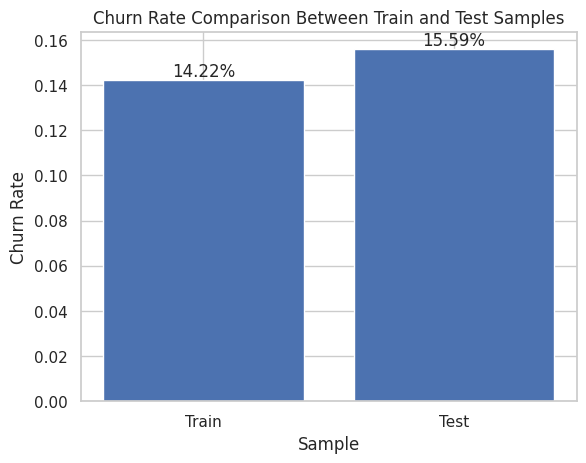

In [101]:
import matplotlib.pyplot as plt

# Calculate churn rate for train and test samples
train_churn_rate = y_train.mean()
test_churn_rate = y_test.mean()

# Create a bar chart to compare churn rates
labels = ['Train', 'Test']
churn_rates = [train_churn_rate, test_churn_rate]

plt.bar(labels, churn_rates)
plt.xlabel('Sample')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Comparison Between Train and Test Samples')

# Add churn rate values on top of the bars
for i in range(len(labels)):
    plt.text(labels[i], churn_rates[i], f'{churn_rates[i]:.2%}', ha='center', va='bottom')

plt.show()


In [102]:
# Perform the chi-squared test of independence
observed = np.array([[int(len(y_train) * train_churn_rate), int(len(y_train) * (1 - train_churn_rate))],
                     [int(len(y_test) * test_churn_rate), int(len(y_test) * (1 - test_churn_rate))]])
chi2, p, _, _ = chi2_contingency(observed)

# Round the chi-square and p-value to four decimal places
chi2 = round(chi2, 4)
p = round(p, 4)

# Print the p-value
print(f"Chi-Square Value = {chi2}")
print(f"P-Value = {p}")

# Check the significance level (e.g., 0.05)
alpha = 0.05
if p > alpha:
    print("The difference in churn rates is not significant.")
else:
    print("The difference in churn rates is significant.")

Chi-Square Value = 0.7081
P-Value = 0.4001
The difference in churn rates is not significant.


In [92]:
# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert predicted probabilities to binary predictions


In [93]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[550  16]
 [ 85  16]]


In [94]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already obtained the 'confusion' matrix
print("Confusion Matrix:")
print(confusion)

# Calculate and print classification report
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)


Confusion Matrix:
[[550  16]
 [ 85  16]]
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.50      0.16      0.24       101

    accuracy                           0.85       667
   macro avg       0.68      0.57      0.58       667
weighted avg       0.81      0.85      0.81       667



In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [38]:
def forward_selection(data, response, candidates):
    remaining = set(candidates)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')

    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response, ' + '.join(selected + [candidate]))
            score = smf.glm(formula, data, family=sm.families.Binomial()).fit().deviance
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)

        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score

    formula = "{} ~ {}".format(response, ' + '.join(selected))
    model = smf.glm(formula, data, family=sm.families.Binomial()).fit()

    return model



In [39]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

def forward_selection(data, response, candidates):
    # Create a dictionary to map original names to names without spaces
    rename_dict = {name: name.replace(" ", "_") for name in candidates}

    # Rename columns for the purpose of regression
    data = data.rename(columns=rename_dict)

    # Adjust the candidate list with the renamed columns
    renamed_candidates = [rename_dict[name] for name in candidates]

    remaining = set(renamed_candidates)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')

    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response, ' + '.join(selected + [candidate]))
            score = smf.glm(formula, data, family=sm.families.Binomial()).fit().deviance
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)

        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score

    formula = "{} ~ {}".format(response, ' + '.join(selected))
    model = smf.glm(formula, data, family=sm.families.Binomial()).fit()

    return model

# List of predictor variables
candidates = ['Intl Plan', 'CustServ Calls', 'VMail Plan', 'Day Charge']

# Perform forward selection
final_model = forward_selection(data, 'Churn', candidates)

# Print the summary of the final model
print(final_model.summary())


                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['Churn[False]', 'Churn[True]']   No. Observations:                 3333
Model:                                         GLM   Df Residuals:                     3328
Model Family:                             Binomial   Df Model:                            4
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -1122.0
Date:                             Mon, 23 Oct 2023   Deviance:                       2244.1
Time:                                     10:21:22   Pearson chi2:                 3.10e+03
No. Iterations:                                  6   Pseudo R-squ. (CS):             0.1430
Covariance Type:                         nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0

In [40]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

def forward_selection(data, response, candidates):
    # Create a dictionary to map original names to names without spaces
    rename_dict = {name: name.replace(" ", "_") for name in candidates}

    # Rename columns for the purpose of regression
    data = data.rename(columns=rename_dict)

    # Adjust the candidate list with the renamed columns
    renamed_candidates = [rename_dict[name] for name in candidates]

    remaining = set(renamed_candidates)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')

    print("\nStepwise selection:\n")

    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response, ' + '.join(selected + [candidate]))
            model = smf.glm(formula, data, family=sm.families.Binomial()).fit()
            score = model.deviance
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)

        if best_new_score < current_score:
            print("Adding variable {} with deviance = {}".format(best_candidate, best_new_score))
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print(model.summary())
            print("----------------------------------------------------------------------\n")

    formula = "{} ~ {}".format(response, ' + '.join(selected))
    final_model = smf.glm(formula, data, family=sm.families.Binomial()).fit()

    return final_model

# List of predictor variables
candidates = ['Intl Plan', 'CustServ Calls', 'VMail Plan', 'Day Charge','Night Charge','Account Length']

# Perform forward selection
final_model = forward_selection(data, 'Churn', candidates)

# Print the summary of the final model
print("\nFinal Model:\n")
print(final_model.summary())



Stepwise selection:

Adding variable Intl_Plan with deviance = 2587.8935650900908
                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['Churn[False]', 'Churn[True]']   No. Observations:                 3333
Model:                                         GLM   Df Residuals:                     3331
Model Family:                             Binomial   Df Model:                            1
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -1293.9
Date:                             Mon, 23 Oct 2023   Deviance:                       2587.9
Time:                                     10:21:37   Pearson chi2:                 3.33e+03
No. Iterations:                                  5   Pseudo R-squ. (CS):            0.04984
Covariance Type:                         nonrobust                                       

In [41]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

def forward_selection(data, response, candidates):
    # Ensure 'Churn' is of type 'category'
    if not pd.api.types.is_categorical_dtype(data[response]):
        data[response] = data[response].astype('category')

    # Reorder the categories of 'Churn' to ensure we model Pr(Churn=True)
    data[response] = data[response].cat.set_categories(data[response].cat.categories[::-1])

    # Create a dictionary to map original names to names without spaces
    rename_dict = {name: name.replace(" ", "_") for name in candidates}

    # Rename columns for the purpose of regression
    data = data.rename(columns=rename_dict)

    # Adjust the candidate list with the renamed columns
    renamed_candidates = [rename_dict[name] for name in candidates]

    remaining = set(renamed_candidates)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')

    print("\nStepwise selection:\n")

    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response, ' + '.join(selected + [candidate]))
            model = smf.glm(formula, data, family=sm.families.Binomial()).fit()
            score = model.deviance
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)

        if best_new_score < current_score:
            print("Adding variable {} with deviance = {}".format(best_candidate, best_new_score))
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print(model.summary())
            print("----------------------------------------------------------------------\n")

    formula = "{} ~ {}".format(response, ' + '.join(selected))
    final_model = smf.glm(formula, data, family=sm.families.Binomial()).fit()

    return final_model

# List of predictor variables
candidates = ['Intl Plan', 'CustServ Calls', 'VMail Plan', 'Day Charge', 'Night Charge','Account Length']

# Perform forward selection
final_model = forward_selection(data, 'Churn', candidates)

# Print the summary of the final model
print("\nFinal Model:\n")
print(final_model.summary())





Stepwise selection:

Adding variable Intl_Plan with deviance = 2587.8935650900908
                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['Churn[True]', 'Churn[False]']   No. Observations:                 3333
Model:                                         GLM   Df Residuals:                     3331
Model Family:                             Binomial   Df Model:                            1
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -1293.9
Date:                             Mon, 23 Oct 2023   Deviance:                       2587.9
Time:                                     10:22:07   Pearson chi2:                 3.33e+03
No. Iterations:                                  5   Pseudo R-squ. (CS):            0.04984
Covariance Type:                         nonrobust                                       